#Задание
**Цель:**  
изучить применение дерева решений в рамках задачи регрессии  
**Описание задания:**  
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.
Скачать датасет также можно по [ссылке](https://u.netology.ru/backend/uploads/lms/content_assets/file/8723/ch.csv)
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Получите данные и загрузите их в рабочую среду

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.target_names

['MedHouseVal']

In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california_housing.target

In [ ]:
data = california_housing.frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2.Проведите первичный анализ.


a.Проверьте данные на пропуски. Удалите в случае обнаружения.


b.*Нормализуйте один из признаков.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


пропусков нет


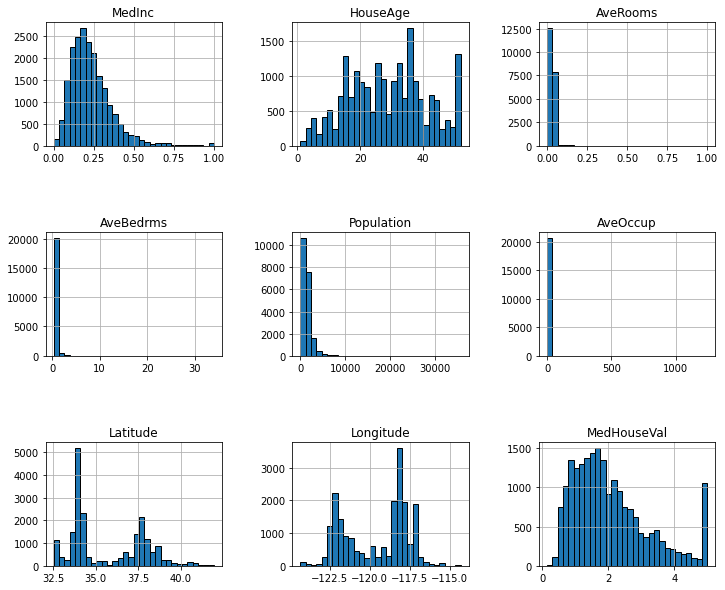

In [ ]:
# распределение данных по каждому признаку
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

выполним нормализацию столбца Population по методу MinMaxScaler

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data[['Population']] = scaler.fit_transform(data[['Population']])

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,41.0,0.043512,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,0.538027,21.0,0.038224,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,0.466028,52.0,0.052756,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,0.354699,52.0,0.035241,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,0.230776,52.0,0.038534,1.081081,0.015752,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,0.073130,25.0,0.029769,1.133333,0.023599,2.560606,39.48,-121.09,0.781
20636,0.141853,18.0,0.037344,1.315789,0.009894,3.122807,39.49,-121.21,0.771
20637,0.082764,17.0,0.030904,1.120092,0.028140,2.325635,39.43,-121.22,0.923
20638,0.094295,18.0,0.031783,1.171920,0.020684,2.123209,39.43,-121.32,0.847


### 3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.Обучите модель регрессии на обучающем множестве

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predict = model.predict(X_test)

### 5.Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [ ]:
model.score(X_train, y_train)

0.6125511913966952

In [ ]:
model.score(X_test, y_test)

0.5757877060324507

### 6.Обучите дерево решений на обучающем множестве.


a. Повторите п. 5 для полученной модели.


b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
model_t = DecisionTreeRegressor(max_depth=3, random_state=123)

In [ ]:
model_t.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [ ]:
model_t.score(X_train, y_train)

0.5378979887726012

In [ ]:
model_t.score(X_test, y_test)

0.5097629887358219

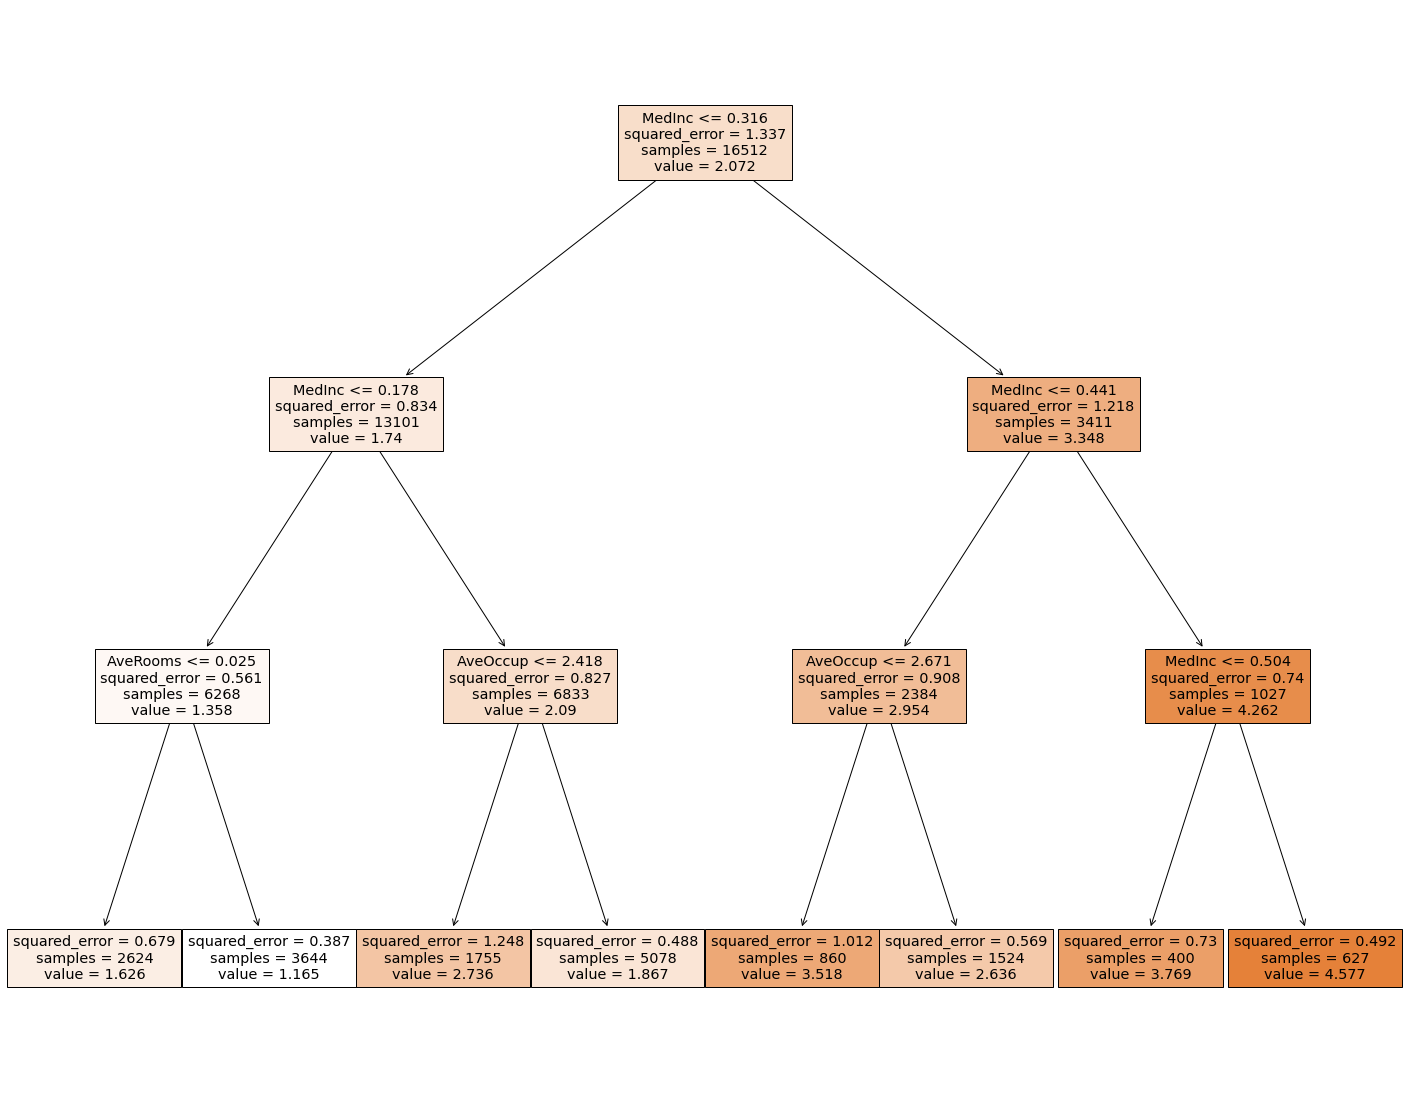

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_t, feature_names=california_housing.feature_names, class_names=california_housing.target_names, filled=True)

### 7.Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.


In [ ]:
# пробуем подобрать оптимальный параметр max_depth
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for i in depth:
    model_tree = DecisionTreeRegressor(max_depth=i, random_state=123).fit(X_train, y_train)
    print(f'max_depth={i}/score: {model_tree.score(X_test, y_test)}')

max_depth=1/score: 0.279511216346382
max_depth=2/score: 0.4244060273337802
max_depth=3/score: 0.5097629887358219
max_depth=4/score: 0.5540288505085005
max_depth=5/score: 0.5997321244428706
max_depth=6/score: 0.6205125146233951
max_depth=7/score: 0.6515700686011479
max_depth=8/score: 0.6775504783730109
max_depth=9/score: 0.6827568672610587
max_depth=10/score: 0.6849192174827219
max_depth=11/score: 0.678782178431096
max_depth=12/score: 0.6634640476470116
max_depth=13/score: 0.6578517106239741
max_depth=14/score: 0.651656670373895
max_depth=15/score: 0.6526042986115359


ВЫВОД: проверили глубину дерева от 1 до 15, при max_depth=10 получили лучший скор 0.6849192174827219

In [ ]:
# пробуем подобрать оптимальный параметр min_samples_leaf

leaf = [3000, 200, 100, 50, 10, 5]

for i in leaf:
    model_tree_1 = DecisionTreeRegressor(min_samples_leaf=i, random_state=123).fit(X_train, y_train)
    print(f'min_samples_leaf=={i}/score: {model_tree_1.score(X_test, y_test)}')


min_samples_leaf==3000/score: 0.4255379751732157
min_samples_leaf==200/score: 0.6375651458048841
min_samples_leaf==100/score: 0.6740331112247003
min_samples_leaf==50/score: 0.7030894927955115
min_samples_leaf==10/score: 0.7223915270464416
min_samples_leaf==5/score: 0.6962279443658993


При задании параметра min_samples_leaf = 10, получили лучший скор

### 8.Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.


b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?


ВЫВОДЫ:

В модели линейной регрессии точность получили хуже, при подборе параметров в дереве решений можно добиться более точных результатов при обучении.


Для задачи классификации дерево решений работает лучше, у него есть параметры, которые можно настраивать для получения лучшего результата.